# How to run the program
To run this notebook, click kernel and run all. This should install the dependancies, import the dataset and perform the model build, saving it for future use.

# Dependacies
 
Installing required libaries using pip.

In [1]:
#Un-comment if installing is required
!pip install tensorflow
!pip install keras

# Import Required Libaries
Setting up the imports for the project and populating an array with the headers for the data about to be captured and a key press boolean for recording keyboard inputs for exporting the array to a csv file.

In [2]:
# first neural network with keras tutorial
from keras.models import Sequential
import numpy as np
from keras.layers import Dense
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import csv

# Formatting Dataset
Importing dataset and converting it to the correct format for training the model.

In [3]:
import csv
file = open("handdata_20220317-124229.csv")
csvreader = csv.reader(file)
header = next(csvreader)
#print(header)
rows = []
labels = []
for row in csvreader:
    label = [0,0,0,0,0,0]
    index = int(row[42])
    label[index] = 1
    labels.append(label)
    row = row[:42]
    rows.append(row)
    
#print(rows)
#print(labels)
file.close()


# split into input (X) and output (y) variables
X = np.array(rows).astype('float32')
Y = np.array(labels).astype('float32')

print(X.shape)
#print(y)

x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size = 0.20, shuffle = True, random_state=42)

print(y_train)
#print(x_val)


(1285, 42)
[[0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 ...
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1.]]


# Training the model
Setting the parameters for the CNN model, feeding the model the data for training, plotting the accuracy and loss of the model for evaluation. Finally saving the model for future use.

(257, 6)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 42)                1806      
                                                                 
 dense_1 (Dense)             (None, 21)                903       
                                                                 
 dense_2 (Dense)             (None, 12)                264       
                                                                 
 dense_3 (Dense)             (None, 6)                 78        
                                                                 
Total params: 3,051
Trainable params: 3,051
Non-trainable params: 0
_________________________________________________________________
Epoch 1/150
206/206 [==============================] - 0s 510us/step - loss: 14.3595 - accuracy: 0.4708
Epoch 2/150
206/206 [==============================] - 0s 491us/step - lo

206/206 [==============================] - 0s 492us/step - loss: 0.1766 - accuracy: 0.9426
Epoch 71/150
206/206 [==============================] - 0s 488us/step - loss: 0.1579 - accuracy: 0.9416
Epoch 72/150
206/206 [==============================] - 0s 498us/step - loss: 0.1118 - accuracy: 0.9572
Epoch 73/150
206/206 [==============================] - 0s 503us/step - loss: 0.1508 - accuracy: 0.9436
Epoch 74/150
206/206 [==============================] - 0s 481us/step - loss: 0.1537 - accuracy: 0.9465
Epoch 75/150
206/206 [==============================] - 0s 498us/step - loss: 0.1215 - accuracy: 0.9504
Epoch 76/150
206/206 [==============================] - 0s 488us/step - loss: 0.2927 - accuracy: 0.9125
Epoch 77/150
206/206 [==============================] - 0s 483us/step - loss: 0.1154 - accuracy: 0.9514
Epoch 78/150
206/206 [==============================] - 0s 502us/step - loss: 0.1520 - accuracy: 0.9446
Epoch 79/150
206/206 [==============================] - 0s 490us/step - loss:

206/206 [==============================] - 0s 488us/step - loss: 0.0993 - accuracy: 0.9708
Epoch 149/150
206/206 [==============================] - 0s 493us/step - loss: 0.1911 - accuracy: 0.9455
Epoch 150/150
9/9 [==============================] - 0s 1000us/step - loss: 0.0809 - accuracy: 0.9728
Accuracy: 97.28


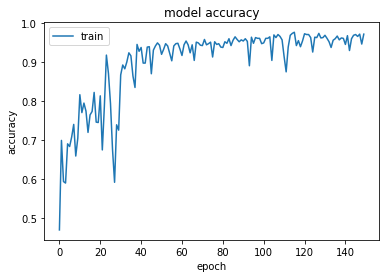

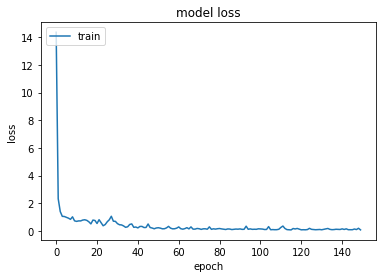

INFO:tensorflow:Assets written to: CNN_Hand_Model\assets


In [4]:
# define the keras model

print(y_val.shape)

model = Sequential()
model.add(Dense(42, input_dim=(42), activation='relu'))
model.add(Dense(21, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(6, activation='softmax'))

model.summary()
# compile the keras model

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
history = model.fit(x_train, y_train, epochs=150, batch_size=5)
# evaluate the keras model
loss , accuracy = model.evaluate(x_val, y_val)
print('Accuracy: %.2f' % (accuracy*100))

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(accuracy)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(loss)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

model.save('CNN_Hand_Model')